In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
df = pd.read_csv(r"College_Data (1).csv")
df.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,SFRatio,perc.alumni,Expend,GradRate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [196]:
nc_colleges = pd.DataFrame( df.loc[[21,42,81,93,159,174,176,188,197,215,235,239,310,411,412,413,444,448,650,651,652,653,654,720,741],["Private","Room.Board", "SFRatio", "Expend","GradRate"]] )
nc_colleges

,Private,Room.Board,SFRatio,Expend,GradRate
21,0,2540,18.3,5854,70
42,1,4850,13.2,7550,52
81,1,2790,21.8,3739,63
93,1,4100,13.5,8425,55
159,1,5070,12.0,17581,94
174,1,5950,5.0,27206,97
176,0,3240,13.2,9002,58
188,1,3883,18.9,6329,63
197,0,2550,15.1,6972,24
215,1,4270,15.2,5664,29


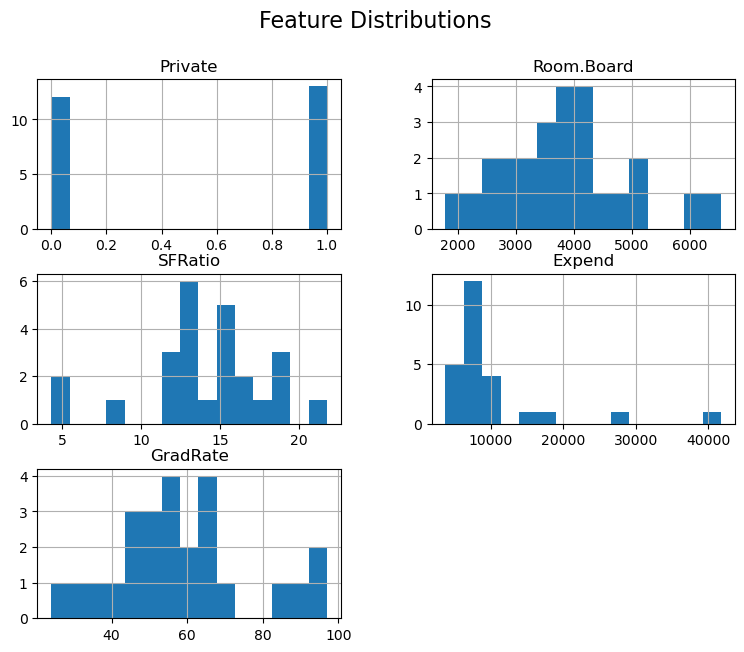

In [205]:
# Visualize feature distributions
nc_colleges.hist(bins=15, figsize=(9,7))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

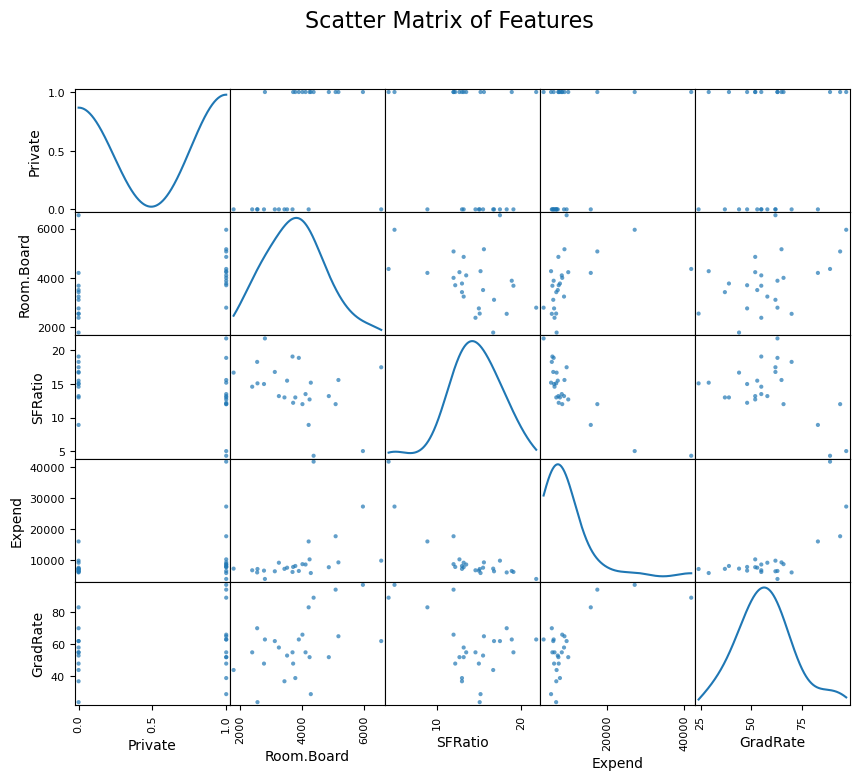

In [206]:
pd.plotting.scatter_matrix(nc_colleges, figsize=(10, 8), diagonal="kde", alpha=0.7)
plt.suptitle("Scatter Matrix of Features", fontsize=16)
plt.show()

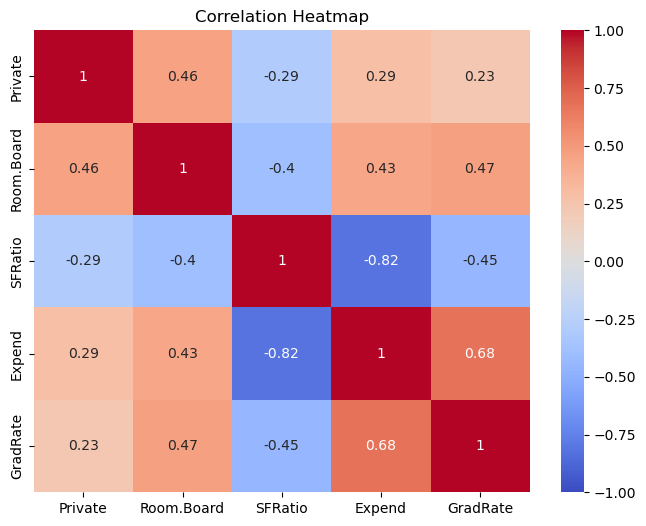

In [207]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nc_colleges.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

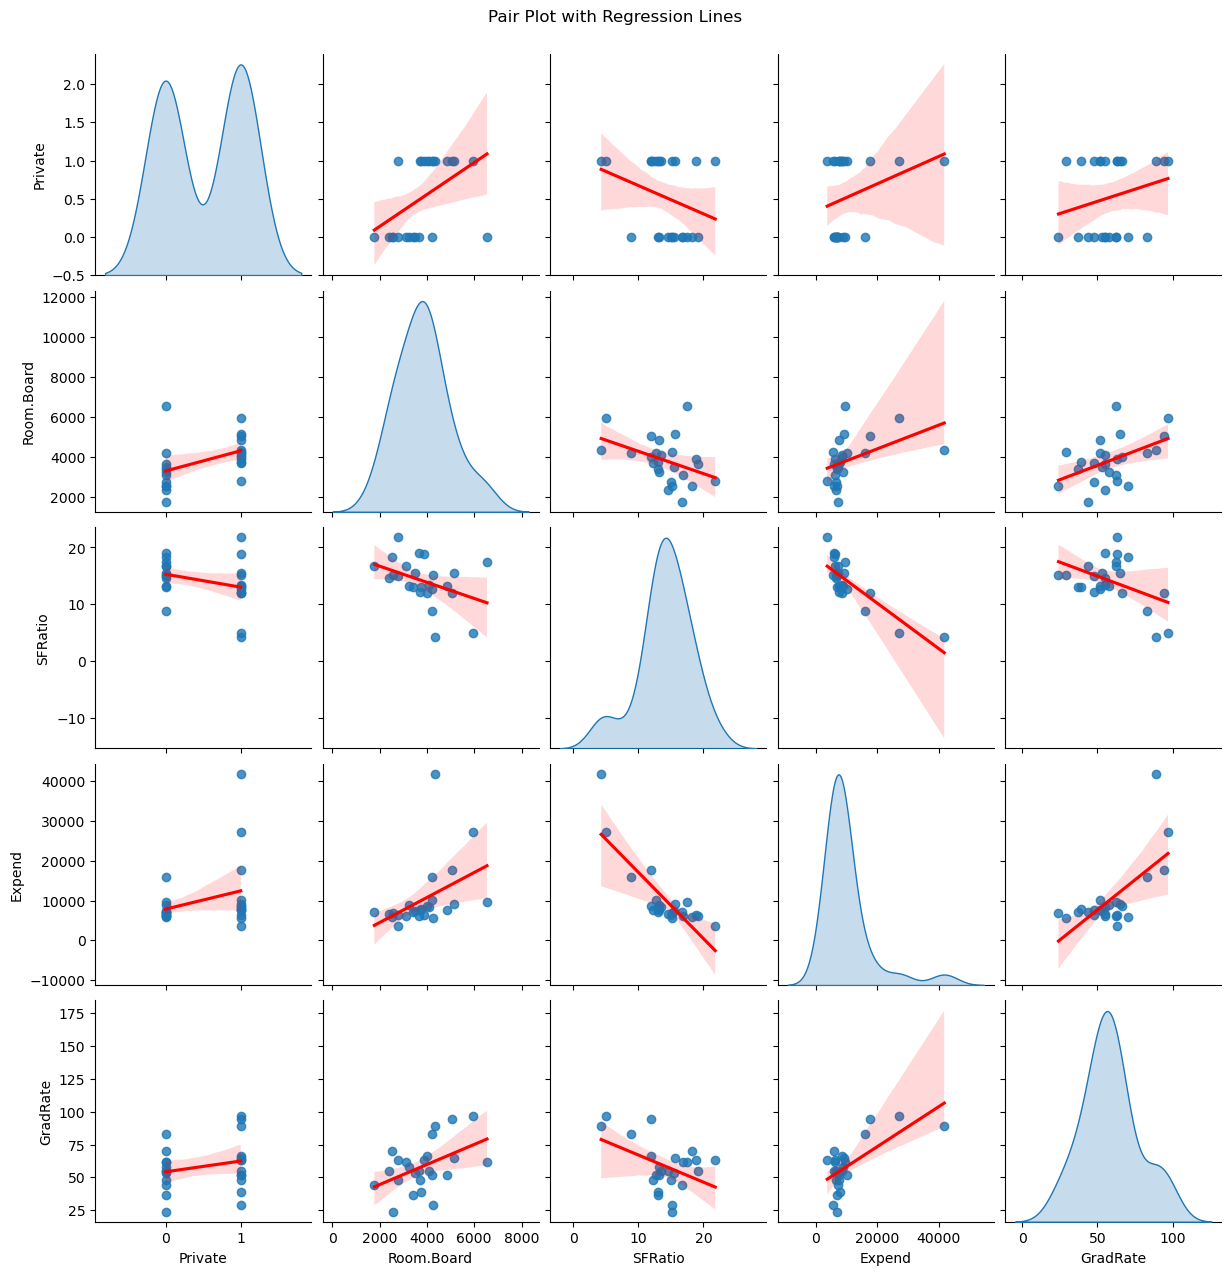

In [208]:
#Pair plot with regression lines
sns.pairplot(nc_colleges, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pair Plot with Regression Lines", y=1.02)
plt.show()

In [198]:
# Split features and target
x = nc_colleges.drop('GradRate', axis=1)
y = nc_colleges['GradRate']

In [199]:
# Standardize features and target
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)
y_standardized = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y_standardized, test_size=0.2, random_state=0)

In [209]:
# Initializing the linear regression model
lr_model = LinearRegression()

# Training the linear regression model with datasets
lr_model.fit(x_train, y_train)

# Making Prediction with the linear regression model
y_pred_lr = lr_model.predict(x_test)

In [210]:
# Decision Tree model
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [212]:
# Evaluation metric
metrics = {
    'Mean Absolute Error': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_dt)],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_dt)],
    'Root Mean Squared Error': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_dt))],
    'R2 Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt)],
    'Mean Absolute Percentage Error': [mean_absolute_percentage_error(y_test, y_pred_lr), mean_absolute_percentage_error(y_test, y_pred_dt)]
}

# Metrics in dataframe
results_df = pd.DataFrame(metrics, index=['Linear Regression', 'Decision Tree'])
print("Regression Metrics:\n") 
results_df

Regression Metrics:



,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean Absolute Percentage Error
Linear Regression,0.654524,0.935510,0.967218,-0.040146,0.495507
Decision Tree,0.557132,0.478009,0.691382,0.468526,1.142028


In [203]:
# Table for Linear Regression coefficients
lr_coefficients = pd.DataFrame({
    "Variable": x.columns,
    "Coefficient": lr_model.coef_
})
print("\nLinear Regression Coefficients:\n")
lr_coefficients


Linear Regression Coefficients:



,Variable,Coefficient
0,Private,0.089715
1,Room.Board,0.133713
2,SFRatio,0.579761
3,Expend,0.905623


In [204]:
# Table for Feature Importance in Decision Tree
feature_importances = pd.DataFrame({
    "Variable": x.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nDecision Tree Feature Importances:\n")
feature_importances


Decision Tree Feature Importances:



,Variable,Importance
3,Expend,0.670285
2,SFRatio,0.228683
1,Room.Board,0.100942
0,Private,0.000089


Interpretations of models:
Both models agree that Expenditure spent per student has the greatest impact on graduation rates, and both models also say student-faculty ratio is the second most important. After that, both room.board costs and the classification of universities (public or private) still have some effect on grad rates but not as large of an impact.

In [220]:
from sklearn.feature_selection import RFE, SequentialFeatureSelector, VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
new_nc_college = pd.DataFrame( df.iloc[[21,42,81,93,159,174,176,188,197,215,235,239,310,411,412,413,444,448,650,651,652,653,654,720,741],:] )
new_nc_colleges = new_nc_college.drop("College", axis = 1)
new_nc_colleges.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,SFRatio,perc.alumni,Expend,GradRate
21,0,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70
42,1,632,494,129,17,36,709,131,9000,4850,300,2480,78,85,13.2,10,7550,52
81,1,2087,1339,657,20,54,3191,1204,7550,2790,600,500,77,77,21.8,34,3739,63
93,1,1083,880,291,13,34,915,80,9270,4100,600,1860,75,82,13.5,27,8425,55
159,1,2373,956,452,77,96,1601,6,17295,5070,600,1011,95,97,12.0,46,17581,94


In [221]:
X_train, X_test, y_train, y_test = train_test_split(new_nc_colleges.drop("GradRate", axis=1), new_nc_colleges["GradRate"], test_size=0.4, random_state=42)

In [222]:
# Dictionary to store selected features
selected_features = {}

#Variance Threshold
selector_variance = VarianceThreshold(threshold=0.1)
selector_variance.fit(X_train)
selected_features['Variance Threshold'] = X_train.columns[selector_variance.get_support()].tolist()

In [223]:
#Correlation matrix
correlation_matrix = X_train.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
selected_features['Correlation'] = X_train.columns.difference(high_corr_features).tolist()

In [224]:
#Statistical Test
selector_kbest = SelectKBest(score_func=f_regression, k=5)
selector_kbest.fit(X_train, y_train)
selected_features['Statistical Test (SelectKBest)'] = X_train.columns[selector_kbest.get_support()].tolist()

In [225]:
#Forward selection with linear selection
lr_model = LinearRegression()
forward_selector = SequentialFeatureSelector(lr_model, n_features_to_select=5, direction='forward', scoring='neg_mean_squared_error', cv=5)
forward_selector.fit(X_train, y_train)
selected_features['Forward Selection (Linear Regression)'] = X_train.columns[forward_selector.get_support()].tolist()

In [226]:
#RFE Decision Tree selector
dt_model = DecisionTreeRegressor()
rfe_selector = RFE(dt_model, n_features_to_select=5)
rfe_selector.fit(X_train, y_train)
selected_features['RFE (Decision Tree Regressor)'] = X_train.columns[rfe_selector.get_support()].tolist()

In [227]:
#Print output
selected_features_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in selected_features.items()]))
selected_features_df

,Variance Threshold,Correlation,Statistical Test (SelectKBest),Forward Selection (Linear Regression),RFE (Decision Tree Regressor)
0,Private,Apps,Top10perc,Private,Apps
1,Apps,Books,Top25perc,Top10perc,Enroll
2,Accept,Expend,Outstate,Books,Outstate
3,Enroll,Outstate,PhD,PhD,PhD
4,Top10perc,P.Undergrad,Expend,perc.alumni,Expend
5,Top25perc,Personal,NaN,NaN,NaN
6,F.Undergrad,PhD,NaN,NaN,NaN
7,P.Undergrad,Private,NaN,NaN,NaN
8,Outstate,Room.Board,NaN,NaN,NaN
9,Room.Board,SFRatio,NaN,NaN,NaN


Models to select features
Logic to select:
Did not use: Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, and P.Undergrad because they do not reflect academic factors of the schools.
Did not use Outstate due to multicolinearity with other financial factors

Logic behind factors chosen:
To quantify the staff, I chose the student-teacher ratio
To quantify money spent by school, I chose expenditure per student
To quantify money students would have to spend, I chose Room.Board because it was the best average that every student would have to spend compared to things like outstate tuition, personal, and books that could vary due to different factors outside of college control.
Finally, chose private to separate the classifications of different universities.